In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime

In [8]:
# create a set of random lats and lngs combos
lats = np.random.uniform(-90,90,size =1500)
lngs = np.random.uniform(-180,180,size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# add lats and longs to a list
coordinates = list(lat_lngs)

In [10]:
# create a list for holding cities
cities = []

# id the nearest city for each lat and lngs combination 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is uniqe add to cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

652

In [11]:
# import API key
from config import weather_api_key

In [12]:
# create URL from Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# create an empty list to hold the weather date 
city_data = []

# print the beginning of the logging
print('Beginning Data Retrieval       ')
print('-------------------------------')

# create counters
record_count = 1
set_count = 1

# loop through all cities in the list 
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create endpoint URL with each city 
    city_url = url + '&q=' + city.replace(' ', '+')
    
    #log the URl, record and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # add 1 to record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | kirkwood
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | zutendaal
Processing Record 13 of Set 1 | mbandaka
Processing Record 14 of Set 1 | amga
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | litovko
Processing Record 17 of Set 1 | sesheke
Processing Record 18 of Set 1 | kerema
Processing Record 19 of Set 1 | anuchino
Processing Record 20 of Set 1 | ndende
Processing Record 21 of Set 1 | provideniya
Processing Rec

Processing Record 37 of Set 4 | pangody
Processing Record 38 of Set 4 | dilbeek
Processing Record 39 of Set 4 | acarau
Processing Record 40 of Set 4 | nakusp
Processing Record 41 of Set 4 | encarnacion
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | yar-sale
Processing Record 44 of Set 4 | maraa
Processing Record 45 of Set 4 | kenai
Processing Record 46 of Set 4 | lerwick
Processing Record 47 of Set 4 | mentok
City not found. Skipping...
Processing Record 48 of Set 4 | itaituba
Processing Record 49 of Set 4 | nome
Processing Record 50 of Set 4 | andros town
Processing Record 1 of Set 5 | lakatoro
Processing Record 2 of Set 5 | karratha
Processing Record 3 of Set 5 | bonavista
Processing Record 4 of Set 5 | galveston
Processing Record 5 of Set 5 | maniitsoq
Processing Record 6 of Set 5 | terra santa
Processing Record 7 of Set 5 | terekli-mekteb
Processing Record 8 of Set 5 | awjilah
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of Set 5 | taolanaro


Processing Record 25 of Set 8 | urumqi
Processing Record 26 of Set 8 | shingu
Processing Record 27 of Set 8 | xiashi
Processing Record 28 of Set 8 | hervey bay
Processing Record 29 of Set 8 | buchanan
Processing Record 30 of Set 8 | vardo
Processing Record 31 of Set 8 | gerash
Processing Record 32 of Set 8 | yichang
Processing Record 33 of Set 8 | airai
Processing Record 34 of Set 8 | komsomolets
Processing Record 35 of Set 8 | chiang klang
Processing Record 36 of Set 8 | shakiso
Processing Record 37 of Set 8 | sorland
Processing Record 38 of Set 8 | mercedes
Processing Record 39 of Set 8 | lewistown
Processing Record 40 of Set 8 | seoul
Processing Record 41 of Set 8 | coquimbo
City not found. Skipping...
Processing Record 42 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 43 of Set 8 | zaozerne
Processing Record 44 of Set 8 | mangit
Processing Record 45 of Set 8 | grindavik
Processing Record 46 of Set 8 | paredon
Processing Record 47 of Set 8 | saint-augustin
Pr

Processing Record 14 of Set 12 | tarauaca
Processing Record 15 of Set 12 | cassilandia
Processing Record 16 of Set 12 | diedorf
Processing Record 17 of Set 12 | langelsheim
Processing Record 18 of Set 12 | khanu woralaksaburi
Processing Record 19 of Set 12 | cadillac
Processing Record 20 of Set 12 | aklavik
Processing Record 21 of Set 12 | monte patria
Processing Record 22 of Set 12 | bubaque
Processing Record 23 of Set 12 | tygda
Processing Record 24 of Set 12 | syracuse
Processing Record 25 of Set 12 | astoria
Processing Record 26 of Set 12 | port hardy
Processing Record 27 of Set 12 | nanakuli
Processing Record 28 of Set 12 | qazanbulaq
Processing Record 29 of Set 12 | slave lake
Processing Record 30 of Set 12 | kalmunai
Processing Record 31 of Set 12 | kayerkan
Processing Record 32 of Set 12 | panaba
Processing Record 33 of Set 12 | great yarmouth
Processing Record 34 of Set 12 | nioro
Processing Record 35 of Set 12 | smithers
Processing Record 36 of Set 12 | marawi
Processing Reco

In [15]:
len(city_data)

598

In [17]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.5669,72.6420,81.63,73,100,12.46,IN,2021-11-18 17:22:02
1,Kirkwood,38.5834,-90.4068,47.52,37,20,7.00,US,2021-11-18 17:22:03
2,Ushuaia,-54.8000,-68.3000,51.42,61,40,21.85,AR,2021-11-18 17:17:33
3,East London,-33.0153,27.9116,63.54,77,0,10.36,ZA,2021-11-18 17:18:15
4,Port Alfred,-33.5906,26.8910,61.48,62,9,11.59,ZA,2021-11-18 17:22:05
5,Arraial Do Cabo,-22.9661,-42.0278,91.36,69,0,12.66,BR,2021-11-18 17:22:06
6,Thompson,55.7435,-97.8558,3.36,85,20,2.30,CA,2021-11-18 17:21:53
7,Georgetown,5.4112,100.3354,76.95,94,20,1.14,MY,2021-11-18 17:22:08
8,Dikson,73.5069,80.5464,-17.55,95,50,3.62,RU,2021-11-18 17:22:09
9,Zutendaal,50.9325,5.5727,49.96,83,90,12.66,BE,2021-11-18 17:22:09


In [18]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2021-11-18 17:22:02,10.5669,72.6420,81.63,73,100,12.46
1,Kirkwood,US,2021-11-18 17:22:03,38.5834,-90.4068,47.52,37,20,7.00
2,Ushuaia,AR,2021-11-18 17:17:33,-54.8000,-68.3000,51.42,61,40,21.85
3,East London,ZA,2021-11-18 17:18:15,-33.0153,27.9116,63.54,77,0,10.36
4,Port Alfred,ZA,2021-11-18 17:22:05,-33.5906,26.8910,61.48,62,9,11.59
5,Arraial Do Cabo,BR,2021-11-18 17:22:06,-22.9661,-42.0278,91.36,69,0,12.66
6,Thompson,CA,2021-11-18 17:21:53,55.7435,-97.8558,3.36,85,20,2.30
7,Georgetown,MY,2021-11-18 17:22:08,5.4112,100.3354,76.95,94,20,1.14
8,Dikson,RU,2021-11-18 17:22:09,73.5069,80.5464,-17.55,95,50,3.62
9,Zutendaal,BE,2021-11-18 17:22:09,50.9325,5.5727,49.96,83,90,12.66


In [20]:
# create the output file (CSV)
output_data_file = 'weather_data/citites.csv'

# export city data to csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [25]:
# extract relevant fields form DF for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [26]:
# get todays date in seconds
today = time.strftime('%x')
today

'11/18/21'

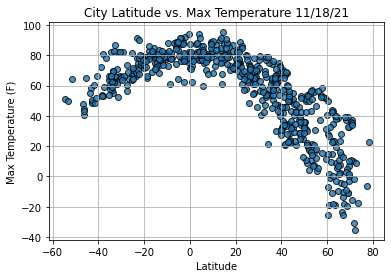

In [46]:
# build scatter plot to lat v max temp
plt.scatter(lats, max_temps,
           edgecolor='black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

plt.title('City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylim()
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

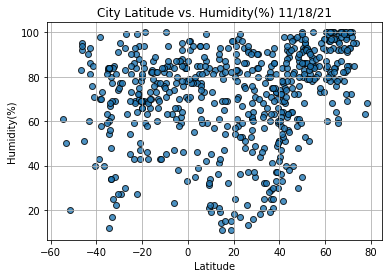

In [51]:
# build scatter plot to lat v humidity
plt.scatter(lats, humidity,
           edgecolor='black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

plt.title('City Latitude vs. Humidity(%) ' + time.strftime('%x'))
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.ylim()
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

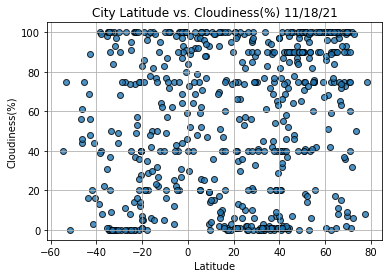

In [52]:
# build scatter plot to lat v cloudiness
plt.scatter(lats, cloudiness,
           edgecolor='black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

plt.title('City Latitude vs. Cloudiness(%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.ylim()
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

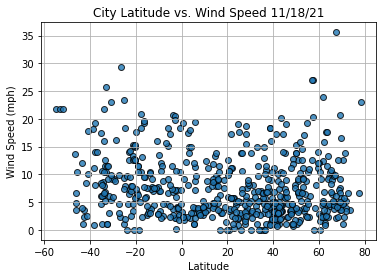

In [54]:
# build scatter plot to lat v wind speed
plt.scatter(lats, wind_speed,
           edgecolor='black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

plt.title('City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylim()
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()